# 範例2. 使用Shap套件，觀察圖像那些位置對辨識最有幫助

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf

# 目前 tensorflow 2.x 版执行 shap 有 bug
# 如果有問題，解除下一行備註
# tf.compat.v1.disable_v2_behavior()

# 載入 MNIST 手寫阿拉伯數字資料
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## 步驟2：定義 CNN 模型

In [2]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

# 增加一維在最後面
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# CNN 模型
input_shape=(28, 28, 1)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟3：模型訓練

In [3]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8443 - loss: 0.4917 - val_accuracy: 0.9803 - val_loss: 0.0670
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9692 - loss: 0.0973 - val_accuracy: 0.9854 - val_loss: 0.0513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9773 - loss: 0.0696 - val_accuracy: 0.9849 - val_loss: 0.0493
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.0610 - val_accuracy: 0.9868 - val_loss: 0.0428
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9838 - loss: 0.0524 - val_accuracy: 0.9877 - val_loss: 0.0388
loss: 0.0309
compile_metrics: 0.9891


## 步驟4：Shap values 計算

In [32]:
import shap
import numpy as np

# 計算 Shap value 的 base
# 目前 tensorflow 2.x 版執行 shap 有 bug
# background = x_train_norm[np.random.choice(x_train_norm.shape[0], 100, replace=False)]
# e = shap.DeepExplainer(model, background)         # shap values 不明顯
e = shap.DeepExplainer(model, x_train_norm[:100])

# 測試第 1 筆
shap_values = e.shap_values(x_test_norm[:1])
# shap_values

## 步驟5：繪製1筆測試資料的特徵歸因

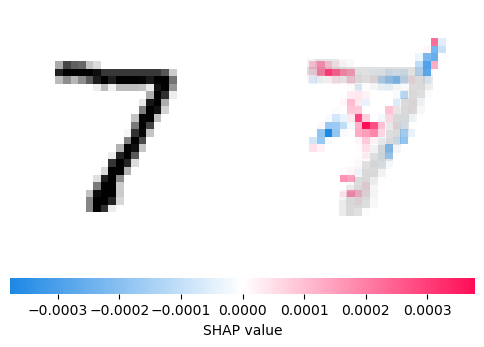

In [33]:
# 繪製特徵的歸因(feature attribution)
# 一次只能顯示一列
shap.image_plot(shap_values, -x_test_norm[:1])